## Dataset Column Descriptions - Car Insurance Claims


- **ID**: Unique identifier for each record in the dataset.  
- **AGE**: Age of the insured customer.  
- **GENDER**: Gender of the customer (Male or Female).  
- **RACE**: Ethnicity or racial background of the customer.  
- **DRIVING_EXPERIENCE**: Number of years the customer has been driving.  
- **EDUCATION**: Education level of the customer (e.g., High School, College).  
- **INCOME**: Annual income of the customer.  
- **CREDIT_SCORE**: Customer’s credit score indicating financial reliability.  
- **VEHICLE_OWNERSHIP**: Ownership status of the vehicle (e.g., Owned, Leased).  
- **VEHICLE_YEAR**: Manufacturing year of the vehicle.  
- **MARRIED**: Marital status of the customer (Married or Not Married).  
- **CHILDREN**: Number of children the customer has.  
- **POSTAL_CODE**: Postal code of the customer’s residence area.  
- **ANNUAL_MILEAGE**: Estimated miles driven annually by the customer.  
- **VEHICLE_TYPE**: Type/category of the vehicle (e.g., SUV, Sedan, Truck).  
- **SPEEDING_VIOLATIONS**: Number of speeding tickets the customer has received.  
- **DUIS**: Number of DUI (Driving Under Influence) offenses.  
- **PAST_ACCIDENTS**: Number of past accidents the customer has been involved in.  
- **OUTCOME**: Outcome of the insurance claim (e.g., Approved, Rejected, Pending).

---

These columns provide valuable insights for analyzing customer behavior, assessing risk factors, and understanding the determinants influencing insurance claim outcomes.

link: https://www.kaggle.com/datasets/sagnik1511/car-insurance-data


---

## Data Overview

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
# Load the dataset
path = '../data/Car_Insurance_Claim.csv'
df = pd.read_csv(path)
df.sample(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
5627,230073,40-64,male,majority,0-9y,none,working class,0.481609,1.0,before 2015,1.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1476,967355,26-39,female,majority,10-19y,none,working class,0.595181,0.0,before 2015,1.0,1.0,10238,12000.0,sedan,2,0,0,0.0
356,37956,26-39,female,majority,10-19y,high school,middle class,0.557400,1.0,before 2015,0.0,1.0,32765,6000.0,sedan,1,0,0,0.0
9384,899767,65+,male,majority,30y+,university,upper class,0.523605,1.0,after 2015,1.0,0.0,10238,11000.0,sedan,7,1,6,0.0
3490,411187,40-64,female,majority,20-29y,none,poverty,0.355258,0.0,before 2015,1.0,0.0,32765,11000.0,sedan,4,0,0,0.0


In [3]:
# Display dataset shape
df.shape

(10000, 19)

In [4]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

---
Among the dataset columns, only **`CREDIT_SCORE`** and **`ANNUAL_MILEAGE`** contain missing values.

- `CREDIT_SCORE` has **982** missing entries.
- `ANNUAL_MILEAGE` has **957** missing entries.

Given the total number of records is **10,000**, the missing value percentages are:

- `CREDIT_SCORE`: 9.82% missing  
- `ANNUAL_MILEAGE`: 9.57% missing
---

In [5]:
# Check for duplicate rows
df[df.drop('ID', axis=1).duplicated()]

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
2370,696360,16-25,female,majority,0-9y,high school,poverty,NaN,0.0,before 2015,0.0,0.0,10238,14000.0,sedan,0,0,0,0.0
3200,748256,16-25,male,majority,0-9y,high school,poverty,NaN,0.0,before 2015,0.0,1.0,32765,NaN,sedan,0,0,0,1.0
4457,326735,16-25,male,majority,0-9y,none,poverty,NaN,0.0,before 2015,0.0,0.0,10238,13000.0,sedan,0,0,0,1.0
5605,312454,16-25,female,majority,0-9y,none,poverty,NaN,0.0,before 2015,0.0,0.0,10238,NaN,sedan,0,0,0,1.0
6151,376517,16-25,female,majority,0-9y,high school,working class,NaN,1.0,before 2015,0.0,1.0,10238,9000.0,sedan,0,0,0,0.0
6766,850513,16-25,female,majority,0-9y,high school,poverty,NaN,0.0,before 2015,0.0,0.0,10238,15000.0,sedan,0,0,0,1.0
7259,255663,16-25,female,majority,0-9y,high school,poverty,NaN,0.0,before 2015,0.0,0.0,10238,14000.0,sedan,0,0,0,1.0
7400,832426,16-25,male,majority,0-9y,none,poverty,NaN,0.0,before 2015,0.0,0.0,10238,14000.0,sedan,0,0,0,1.0
7702,58714,16-25,male,majority,0-9y,none,poverty,NaN,0.0,before 2015,0.0,0.0,10238,17000.0,sedan,0,0,0,1.0
7802,606287,16-25,female,majority,0-9y,high school,poverty,NaN,0.0,before 2015,0.0,0.0,10238,15000.0,sedan,0,0,0,1.0


---

> After removing the `ID` column, we found **12 duplicated records (~0.12% of 10,000 total records)** in the dataset.

All of these duplicated records share the following characteristics:
 - `VEHICLE_TYPE` = Sedan  
 - `VEHICLE_YEAR` = Before 2015  
 - `RACE` = Majority group  
 - `DUIS` = 0  
 - `CREDIT_SCORE` = Missing values

> This pattern suggests a group of similar entries that may require further investigation for data quality or redundancy.

---

In [6]:
# Drop the 'ID' column as it is not needed for analysis
df = df.drop('ID', axis=1)

In [7]:
# remove duplicate rows based on all columns except 'ID'
df = df.drop_duplicates()
# Check for duplicate rows again
df[df.duplicated()].sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           0.0
VEHICLE_OWNERSHIP      0.0
VEHICLE_YEAR             0
MARRIED                0.0
CHILDREN               0.0
POSTAL_CODE              0
ANNUAL_MILEAGE         0.0
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                0.0
dtype: object

In [8]:
df.columns

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

## Data Splitting

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Define features and target variable
x = df.iloc[:, :-1]  
y = df.iloc[:, -1]

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
# Combine x_train and y_train for display
df = pd.concat([x_train, y_train], axis=1)
df.head(3)

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9529,26-39,male,majority,10-19y,university,middle class,0.489112,1.0,after 2015,0.0,0.0,10238,14000.0,sedan,0,0,2,0.0
2168,16-25,male,majority,0-9y,high school,middle class,0.599989,1.0,after 2015,0.0,1.0,10238,12000.0,sports car,0,0,0,0.0
6268,65+,male,majority,30y+,university,upper class,0.663392,1.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,1,5,0.0


### *Note on Data Splitting*



> Data splitting was performed at the very beginning to ensure that the model only sees the training data during learning. This preserves the test data as completely unseen and untouched, reflecting the true natural distribution of the data.

> After splitting, the training features (`X_train`) and target (`y_train`) were combined back into a single DataFrame. This was done to facilitate **Exploratory Data Analysis (EDA)** and subsequent data preprocessing steps efficiently and clearly on the training set alone.

> This approach helps avoid any data leakage and ensures that the test set remains a reliable measure for evaluating the model's generalization performance.



---

## Data Cleaning

In [12]:
# Separate categorical and numerical columns
cat_cols = df.select_dtypes(include=['object'])
num_cols = df.select_dtypes(exclude=['object'])

In [13]:
# Display sample of categorical columns
cat_cols.sample(5)

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
2135,26-39,female,majority,10-19y,university,upper class,after 2015,sedan
6024,40-64,female,majority,0-9y,university,upper class,after 2015,sedan
7059,65+,female,majority,0-9y,university,upper class,after 2015,sedan
5724,40-64,female,majority,10-19y,university,upper class,after 2015,sedan
386,40-64,male,minority,0-9y,university,upper class,before 2015,sedan


In [14]:
# Display sample of numerical columns
num_cols.sample(5)

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9632,0.604726,1.0,0.0,1.0,10238,16000.0,1,0,0,0.0
7285,0.573744,1.0,1.0,1.0,10238,NaN,2,0,0,0.0
7115,0.617353,0.0,0.0,1.0,32765,11000.0,8,1,1,0.0
2308,NaN,0.0,0.0,1.0,10238,15000.0,0,0,0,1.0
5884,0.427974,0.0,0.0,1.0,32765,10000.0,0,0,0,1.0


---
The `POSTAL_CODE` column is expected to contain string values (text), as postal codes often include leading zeros or letters depending on the country.  
However, we found some entries contain decimal numbers, which is unusual and likely indicates a data quality issue. This could be due to incorrect data type conversions or input errors.  

To ensure consistency and preserve the original formatting, it is recommended to convert the `POSTAL_CODE` column to string type and clean any invalid decimal entries.

---

In [15]:
# convert POSTAL_CODE to string type
df['POSTAL_CODE'] = df['POSTAL_CODE'].astype(str)

# Check the data type of POSTAL_CODE
print(df['POSTAL_CODE'].dtype)

object


---

In [16]:
# Separate categorical and numerical columns
cat_cols = df.select_dtypes(include=['object'])
num_cols = df.select_dtypes(exclude=['object'])

In [17]:
# Display descriptive statistics for numerical columns
num_cols.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,7215.000000,7990.000000,7990.000000,7990.000000,7235.000000,7990.000000,7990.000000,7990.000000,7990.000000
mean,0.515448,0.702003,0.498623,0.688611,11681.409813,1.473967,0.239675,1.063955,0.312015
std,0.138172,0.457407,0.500029,0.463091,2812.317628,2.233130,0.556038,1.660446,0.463345
min,0.064810,0.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,0.416233,0.000000,0.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000
50%,0.524521,1.000000,0.000000,1.000000,12000.000000,0.000000,0.000000,0.000000,0.000000
75%,0.617804,1.000000,1.000000,1.000000,14000.000000,2.000000,0.000000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,22000.000000,19.000000,6.000000,15.000000,1.000000


---
> The `CREDIT_SCORE` & `ANNUAL_MILEAGE` columns contains missing values that need to be addressed.

> Additionally, the columns `SPEEDING_VIOLATIONS`, `DUIS`, and `PAST_ACCIDENTS` likely contain outliers or erroneous entries. This is indicated by the large gaps between their **mean** and **maximum values**, and the fact that the **standard deviation** does not adequately cover this range.

These observations suggest the need for careful data cleaning and outlier handling for these features.

----

In [18]:
# Display descriptive statistics for categorical columns
cat_cols.describe()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,POSTAL_CODE,VEHICLE_TYPE
count,7990,7990,7990,7990,7990,7990,7990,7990,7990
unique,4,2,2,4,3,4,2,4,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,10238,sedan
freq,2446,4000,7191,2830,3323,3464,5583,5533,7604


---

In [19]:
import sys
import os

# Add the src directory to the system path
sys.path.append(os.path.abspath('../src'))

In [20]:
from utils import ttest_missing_vs_not
from utils import chi2_missing_vs_categorical

### Missing columns with number columns

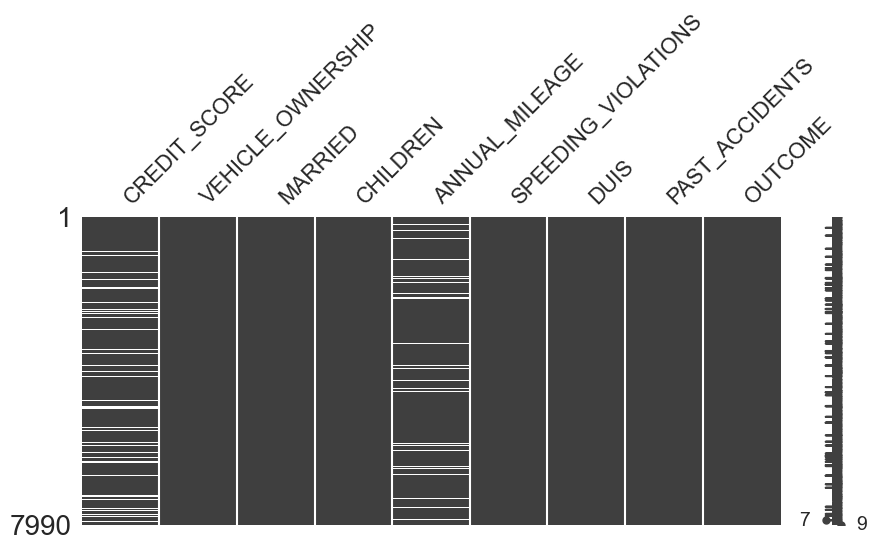

In [21]:
msno.matrix(num_cols, figsize=(10, 4))
plt.show()

In [22]:
# Perform t-test for 'CREDIT_SCORE' column
results = ttest_missing_vs_not(df, 'CREDIT_SCORE')

print(f"{'Column':<20} {'P-value':<10} {'Significant (p<0.05)':<20}")
for col, t_stat, p_val, signif in results:
    if t_stat is None:
        print(f"{col:<20} {'-':<10} {'-':<20}")
    else:
        print(f"{col:<20} {p_val:<10.4f} {signif:<20}")

Column               P-value    Significant (p<0.05)
VEHICLE_OWNERSHIP    0.1667     No                  
MARRIED              0.3475     No                  
CHILDREN             0.6035     No                  
ANNUAL_MILEAGE       0.8158     No                  
SPEEDING_VIOLATIONS  0.5031     No                  
DUIS                 0.3461     No                  
PAST_ACCIDENTS       0.4183     No                  
OUTCOME              0.6935     No                  


In [23]:
# Perform t-test for 'ANNUAL_MILEAGE' column
results = ttest_missing_vs_not(df, 'ANNUAL_MILEAGE')

print(f"{'Column':<20} {'P-value':<10} {'Significant (p<0.05)':<20}")
for col, t_stat, p_val, signif in results:
    if t_stat is None:
        print(f"{col:<20} {'-':<10} {'-':<20}")
    else:
        print(f"{col:<20} {p_val:<10.4f} {signif:<20}")

Column               P-value    Significant (p<0.05)
CREDIT_SCORE         0.4369     No                  
VEHICLE_OWNERSHIP    0.3985     No                  
MARRIED              0.9111     No                  
CHILDREN             0.7975     No                  
SPEEDING_VIOLATIONS  0.8579     No                  
DUIS                 0.7858     No                  
PAST_ACCIDENTS       0.0909     No                  
OUTCOME              0.3947     No                  


---
Conclusion from t-test Analysis on Missing Values

> Independent t-tests were conducted to compare the numerical features between rows with missing and non-missing values in the `CREDIT_SCORE` and `ANNUAL_MILEAGE` columns.

- The results showed **no statistically significant differences** across all numerical columns for both cases.
- This implies that the missingness in both `CREDIT_SCORE` and `ANNUAL_MILEAGE` is **not related** to variations in other numerical features.
- Therefore, the missing values in these columns can be considered **missing completely at random (MCAR)** with respect to the numerical data.

---

### Missing columns with categorical columns

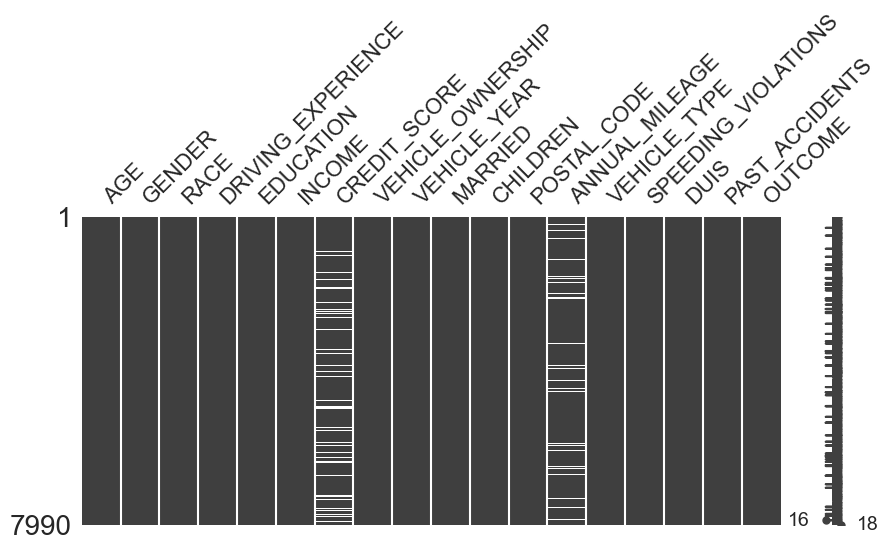

In [24]:
msno.matrix(df, figsize=(10, 4))
plt.show()

In [25]:
# Perform Chi-squared test for 'CREDIT_SCORE' column
results = chi2_missing_vs_categorical(df, 'CREDIT_SCORE')
print(f"{'Categorical Column':<20} {'Chi2 Statistic':<15} {'P-value':<10} {'Significant (p<0.05)':<20}")
for col, chi2_stat, p_val, signif in results:
    print(f"{col:<20} {chi2_stat:<15.4f} {p_val:<10.4f} {signif:<20}")

Categorical Column   Chi2 Statistic  P-value    Significant (p<0.05)
AGE                  7.2789          0.0635     No                  
GENDER               0.0013          0.9708     No                  
RACE                 2.6832          0.1014     No                  
DRIVING_EXPERIENCE   4.6782          0.1969     No                  
EDUCATION            3.3239          0.1898     No                  
INCOME               2.2726          0.5178     No                  
VEHICLE_YEAR         0.9726          0.3240     No                  
POSTAL_CODE          1.3512          0.7170     No                  
VEHICLE_TYPE         0.1318          0.7166     No                  


In [26]:
# Perform Chi-squared test for 'ANNUAL_MILEAGE' column
results = chi2_missing_vs_categorical(df, 'ANNUAL_MILEAGE')

print(f"{'Categorical Column':<20} {'Chi2 Statistic':<15} {'P-value':<10} {'Significant (p<0.05)':<20}")
for col, chi2_stat, p_val, signif in results:
    print(f"{col:<20} {chi2_stat:<15.4f} {p_val:<10.4f} {signif:<20}")

Categorical Column   Chi2 Statistic  P-value    Significant (p<0.05)
AGE                  1.0379          0.7921     No                  
GENDER               1.0620          0.3028     No                  
RACE                 1.0402          0.3078     No                  
DRIVING_EXPERIENCE   4.2631          0.2344     No                  
EDUCATION            1.3499          0.5092     No                  
INCOME               2.9645          0.3971     No                  
VEHICLE_YEAR         1.1644          0.2806     No                  
POSTAL_CODE          6.0237          0.1105     No                  
VEHICLE_TYPE         0.0302          0.8620     No                  


---
Conclusion from Chi-square Analysis on Missing Values

> Independent chi-square tests were conducted to examine the association between missingness in the `CREDIT_SCORE` and `ANNUAL_MILEAGE` columns and all categorical features in the dataset.

- The results showed **no statistically significant associations** between missingness in both columns and any of the categorical variables.
- This indicates that the missing values in `CREDIT_SCORE` and `ANNUAL_MILEAGE` are **not related** to the variations in the categorical features.
- Therefore, the missingness in these columns can be considered **missing completely at random (MCAR)** with respect to the categorical data.
---

### Handling Missing Values

Since the missing values in `CREDIT_SCORE` and `ANNUAL_MILEAGE` columns were found to be **Missing Completely At Random (MCAR)** — meaning there is no significant association with other features —  
it is reasonable to impute these missing values using the **mean** of each column.

Additionally, the proportion of missing values exceeds **9%**, which is relatively high, making it impractical to simply drop these rows as it would lead to significant data loss.

To ensure proper and consistent handling of missing values during model training and evaluation,  
we will apply mean imputation within the preprocessing pipeline.

This approach allows us to:  
- Retain as much data as possible  
- Avoid bias introduced by dropping data  
- Maintain reproducibility and proper workflow during model fitting and inference


In [27]:
# Fill missing values in 'CREDIT_SCORE' and 'ANNUAL_MILEAGE' with their respective means
df['CREDIT_SCORE'] = df['CREDIT_SCORE'].fillna(df['CREDIT_SCORE'].mean())
df['ANNUAL_MILEAGE'] = df['ANNUAL_MILEAGE'].fillna(df['ANNUAL_MILEAGE'].mean())

# Check if there are any missing values left
df['CREDIT_SCORE'].isnull().sum(), df['ANNUAL_MILEAGE'].isnull().sum()

(np.int64(0), np.int64(0))

### Checking for outliers

In [28]:
from utils import get_outliers

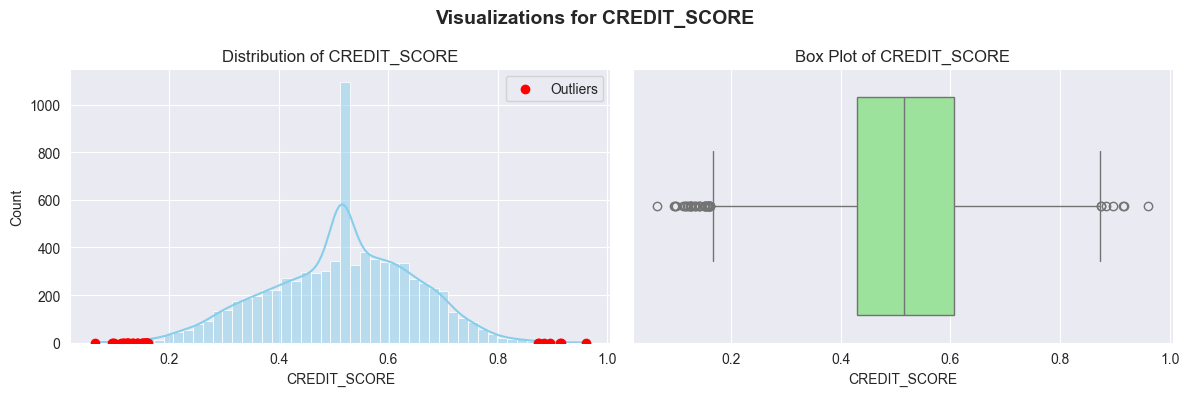

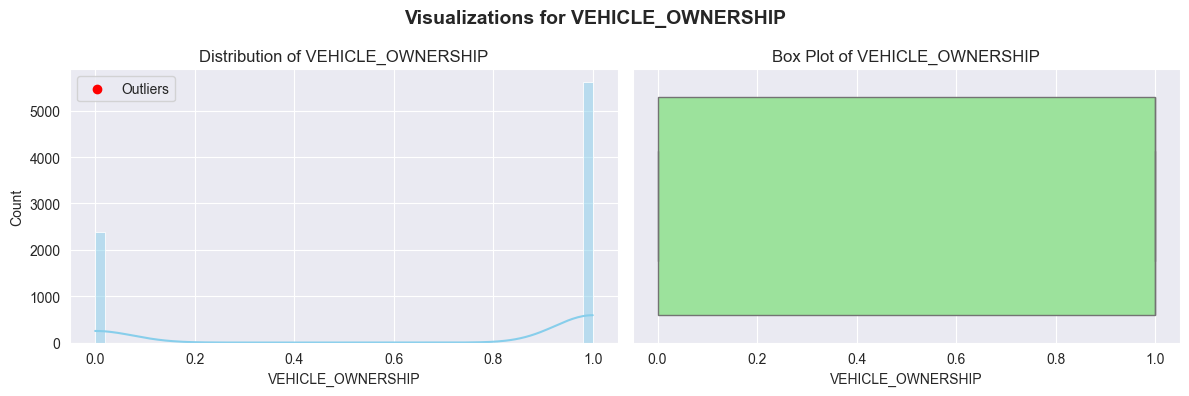

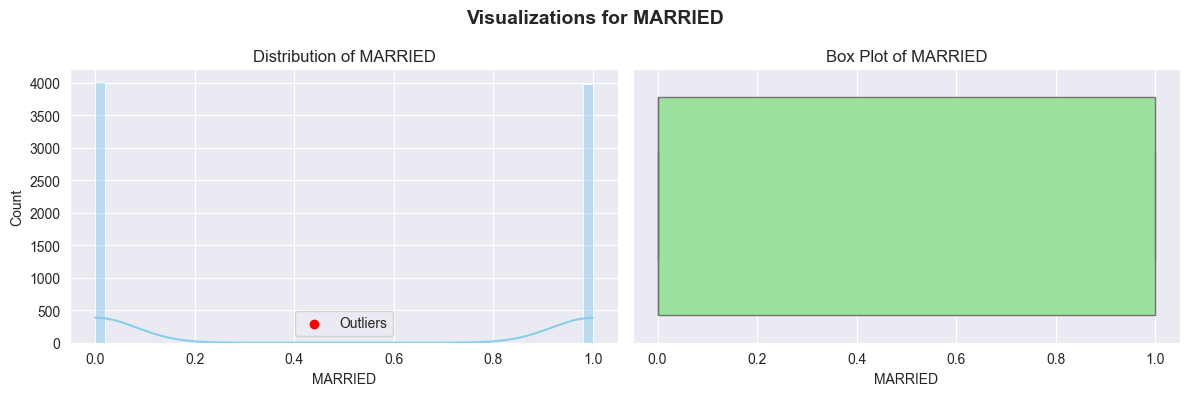

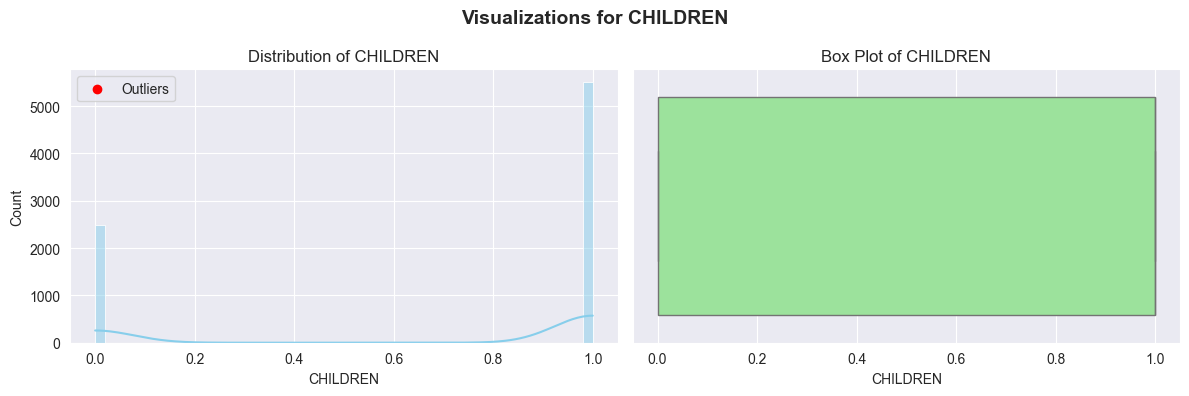

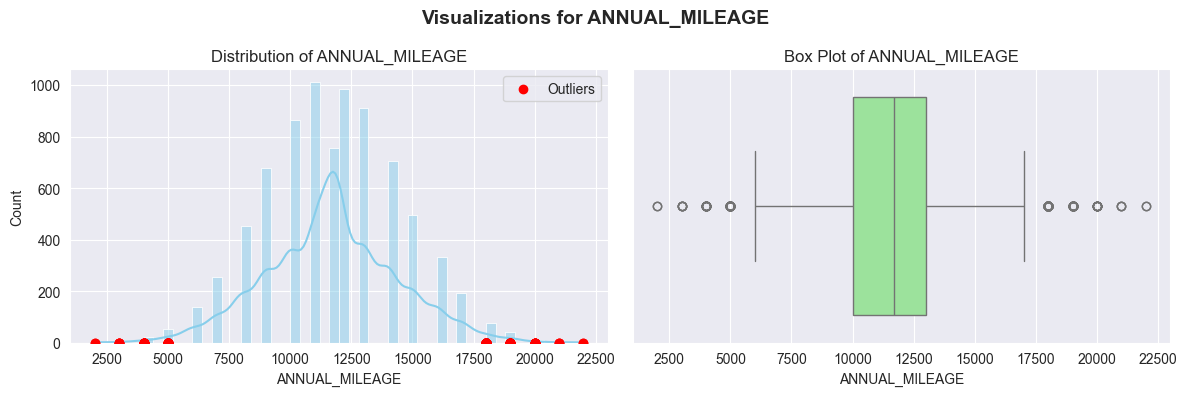

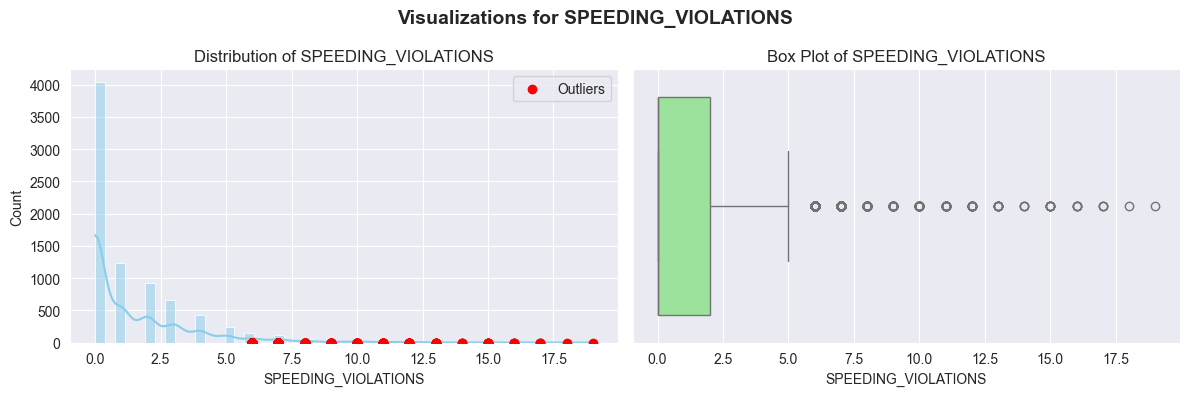

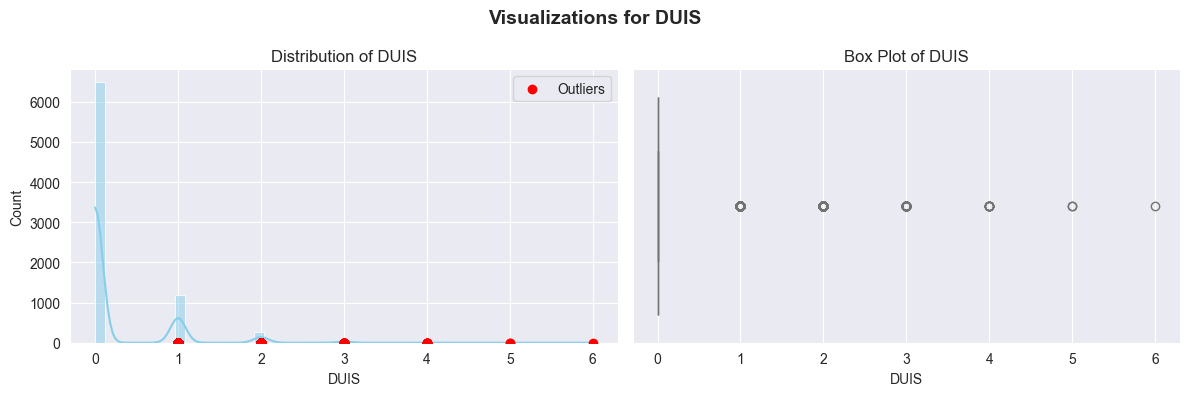

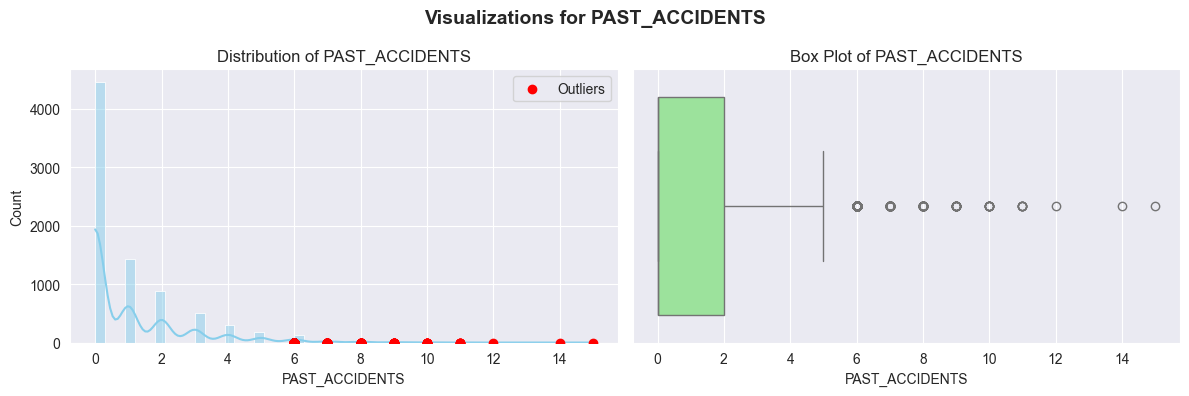

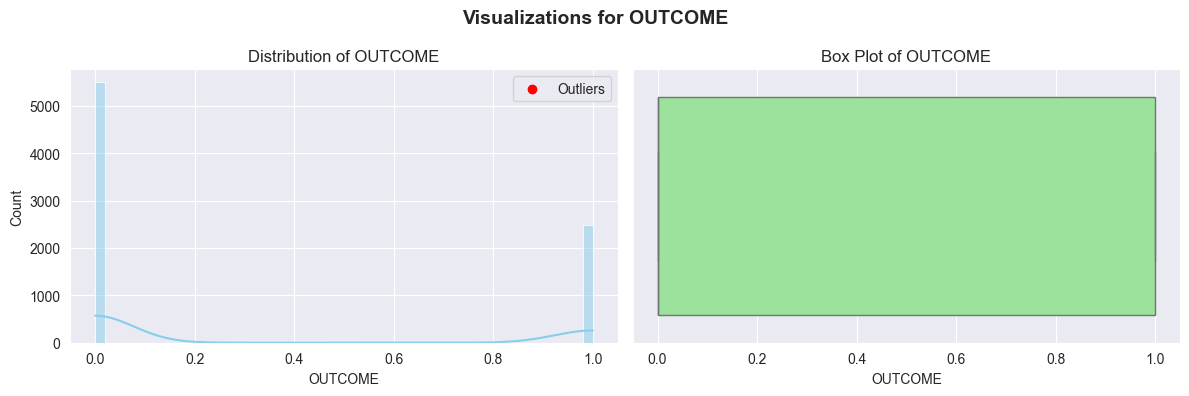

In [29]:
# Visualize the distribution & outliers of numerical columns
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f"Visualizations for {col}", fontsize=14, fontweight='bold')

    # Histogram with KDE
    sns.histplot(df[col], kde=True, bins=50, ax=axes[0], color='skyblue')
    
    # Highlight outliers
    outliers = get_outliers(df[col].dropna())
    axes[0].scatter(outliers, [0]*len(outliers), color='red', label='Outliers', zorder=5)
    
    axes[0].set_title(f"Distribution of {col}")
    axes[0].set_xlabel(col)
    axes[0].legend()

    # Box plot
    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f"Box Plot of {col}")
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()


---
After analyzing the data, it was found that the following columns contain **outliers**:  

- **PAST_ACCIDENTS**  
- **DUIS**  
- **SPEEDING_VIOLATIONS**  
- **ANNUAL_MILEAGE**  
- **CREDIT_SCORE**  

However, since these columns represent important indicators related to the number of violations, past accidents, DUI incidents, annual mileage, and credit score, **it is not recommended to remove the outliers** in this case.  

It is also expected that there may be a relationship between **speeding violations** and **annual mileage**, which should be analyzed further in the next stages of the work.

---

### Handling outliers

In [30]:
from scipy.stats import skew

col_skew = skew(df['CREDIT_SCORE'], nan_policy='omit')
print(f"{'CREDIT_SCORE'} skewness: {col_skew:.2f}")

col_skew = skew(df['ANNUAL_MILEAGE'], nan_policy='omit')
print(f"{'ANNUAL_MILEAGE'} skewness: {col_skew:.2f}")

CREDIT_SCORE skewness: -0.21
ANNUAL_MILEAGE skewness: 0.06


**Outlier Treatment Strategy**

Based on skewness analysis:  

- **`CREDIT_SCORE`** and **`ANNUAL_MILEAGE`**  
  - Skewness values are between **-1 and 1**, meaning their distributions are approximately normal.  
  - **Chosen method:** **Z-score clipping**  
    - Reason: Works best when the data is close to normal distribution.  

- **`SPEEDING_VIOLATIONS`**, **`DUIS`**, **`PAST_ACCIDENTS`**  
  - Distributions are **right-skewed** (long tail on the right).  
  - **Chosen method:** **IQR clipping**  
    - Reason: More robust for skewed data; does not assume normality.  

---

**Why Clipping (not removal)?**
- All these features are **important** for the analysis (traffic violations, past accidents, mileage, credit score).  
- Outliers in this context may represent **real extreme cases** rather than errors.  
- **Clipping** reduces extreme influence without **losing any data**.  
- This ensures the model retains all information while controlling the impact of extreme values.


In [31]:
# Columns with outliers using z-score method
cols_with_outliers_z = ["CREDIT_SCORE", "ANNUAL_MILEAGE"]

# Columns with outliers using IQR method
cols_with_outliers_iqr = ["SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS"]

In [32]:
from utils import zscore_clip

# Handle outliers using z-score clipping
df = zscore_clip(df, cols_with_outliers_z)


In [33]:
from utils import iqr_clip

# Handle outliers using IQR clipping
df = iqr_clip(df, cols_with_outliers_iqr)

## Exploratory Data Analysis (EDA)

### Univariate Analysis

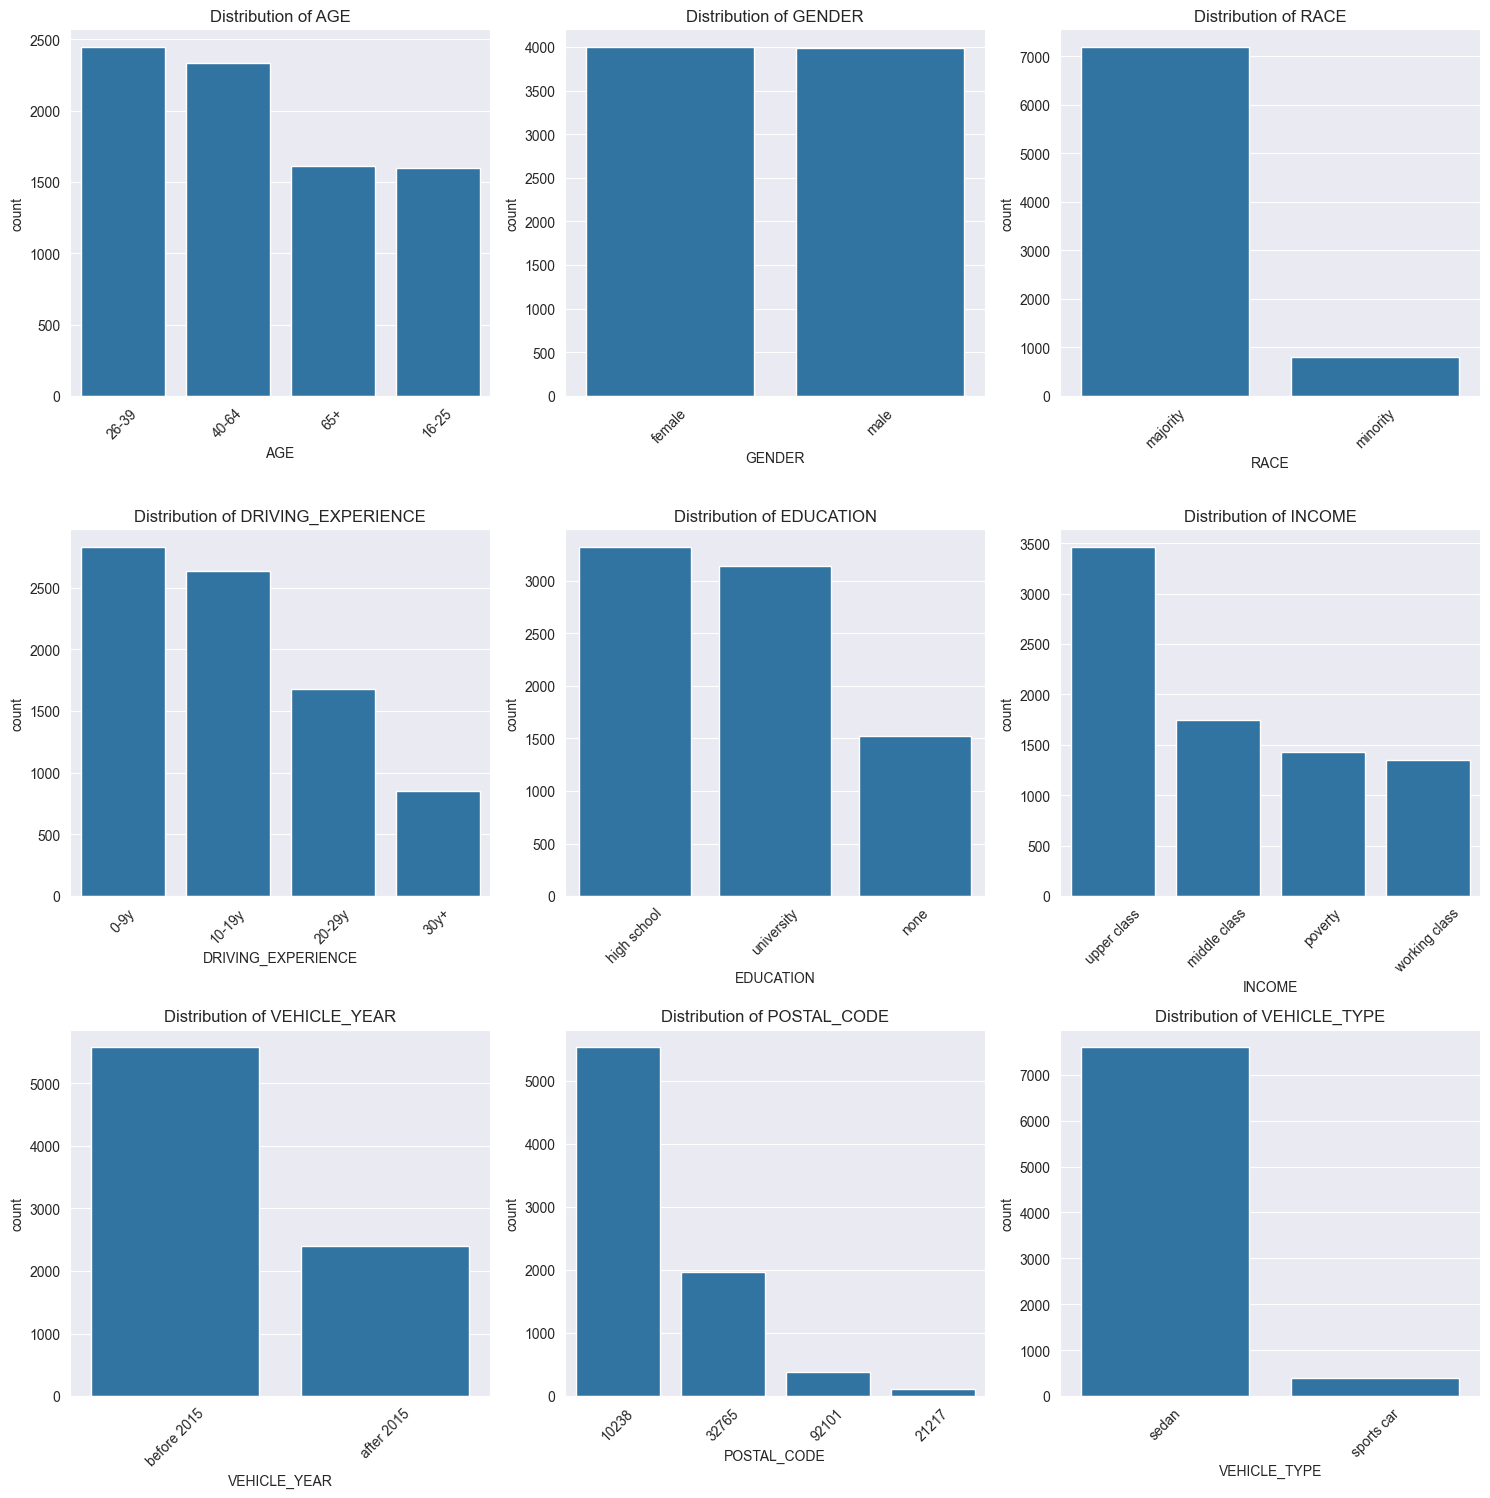

In [34]:
from utils import plot_categorical_distribution

# Plot categorical distributions
plot_categorical_distribution(df, cat_cols=cat_cols)


**Conclusions**

Most individuals in our dataset are young, typically in their post-graduation years. There is no noticeable gender bias, as the ratio between males and females is quite balanced. The racial distribution shows that the majority belong to the dominant racial group.  

Most people have between 0 and 9 years of driving experience, which is expected given the young age group. A large portion of the individuals are well-educated, which is positive as it suggests they are more likely to understand and follow driving rules.  

The majority have high income, which naturally makes car ownership more common; however, other income groups also own cars in notable proportions. Most vehicles are from before 2015, which is reasonable as older cars are more affordable for less wealthy groups.  

There is, however, **a location bias**, as most of the data is concentrated in a single area `(10238)`. Finally, most cars in the dataset are sedans.


### Bivariate Analysis 

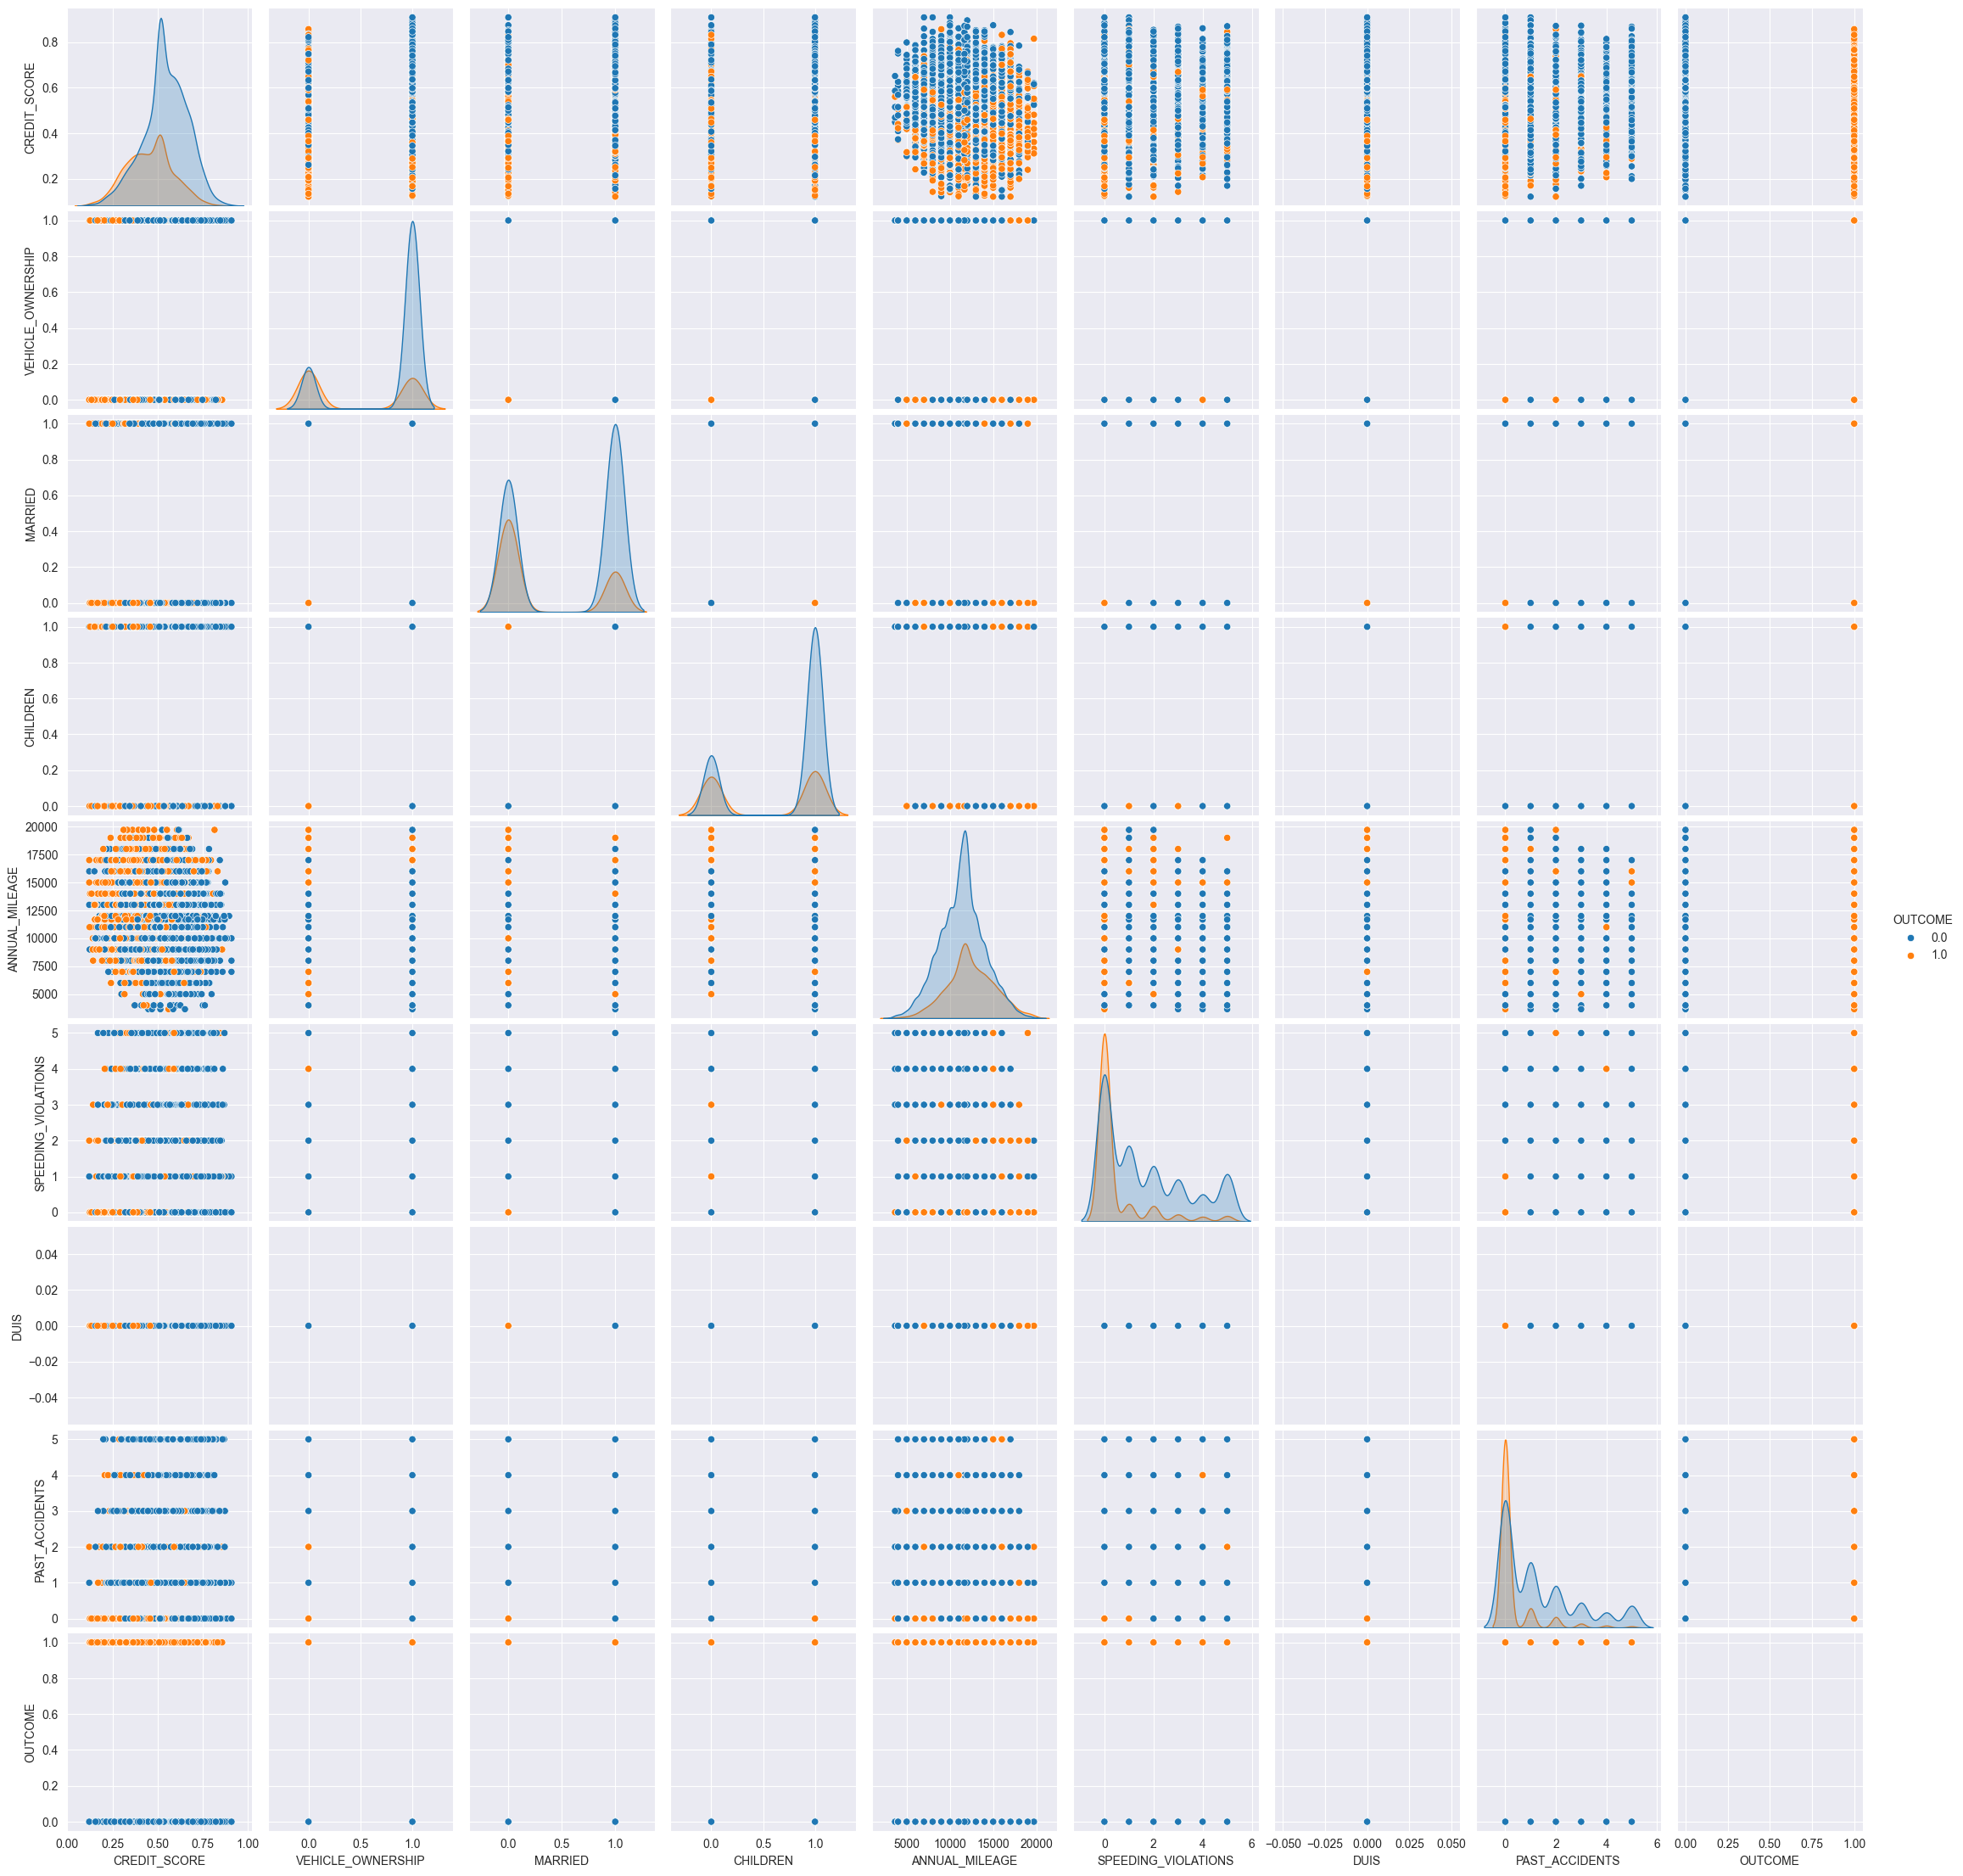

In [35]:
sns.pairplot(df, hue='OUTCOME', vars=num_cols.columns, diag_kind='kde')

As the number of accidents increases, the likelihood of rejection also increases. 

*Additionally*, higher speeding violations are associated with a greater number of accidents.


<Axes: xlabel='PAST_ACCIDENTS', ylabel='SPEEDING_VIOLATIONS'>

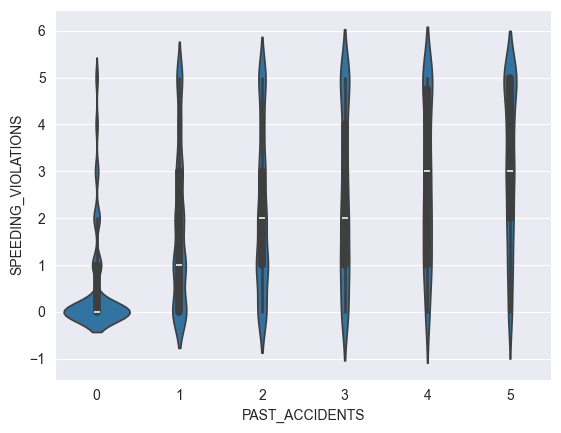

In [36]:
# show the distribution of 'SPEEDING_VIOLATIONS' and 'PAST_ACCIDENTS' using violin plot
sns.violinplot(x='PAST_ACCIDENTS', y='SPEEDING_VIOLATIONS', data=df)

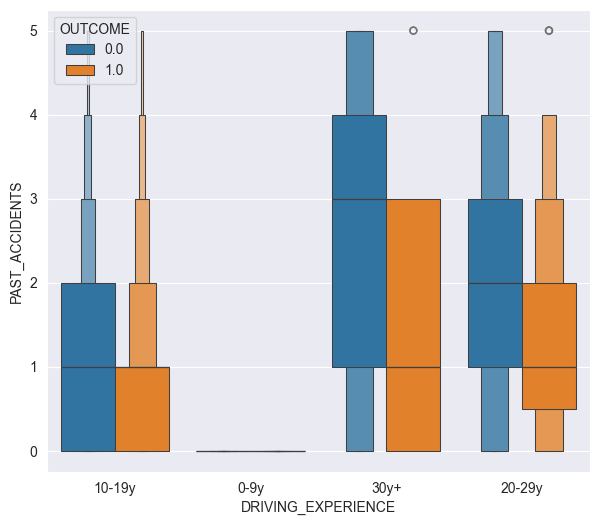

In [37]:
plt.figure(figsize=(7,6))
sns.boxenplot(data=df, x="DRIVING_EXPERIENCE", y="PAST_ACCIDENTS", hue="OUTCOME")
plt.show()

As driving experience increases, the number of accidents also tends to increase, but at the same time, acceptance rates improve. This suggests that accidents serve as a learning opportunity for drivers and are likely a significant source of experience.


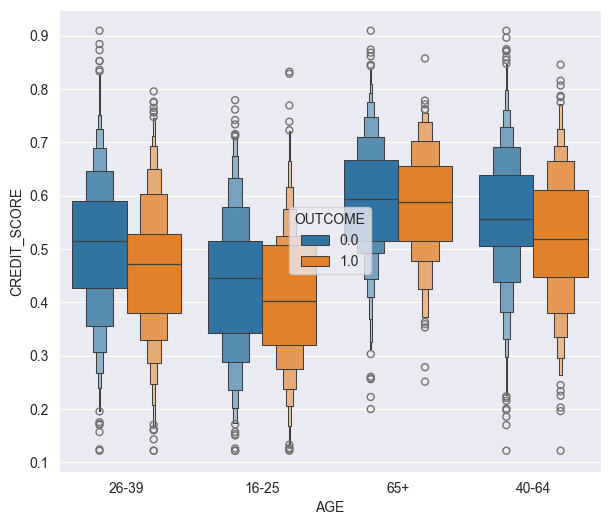

In [38]:
plt.figure(figsize=(7,6))
sns.boxenplot(data=df, x="AGE", y="CREDIT_SCORE", hue="OUTCOME")
plt.show()

In general, as age increases, credit scores tend to be higher and show less variation. On the other hand, age itself exhibits greater variability across the dataset.


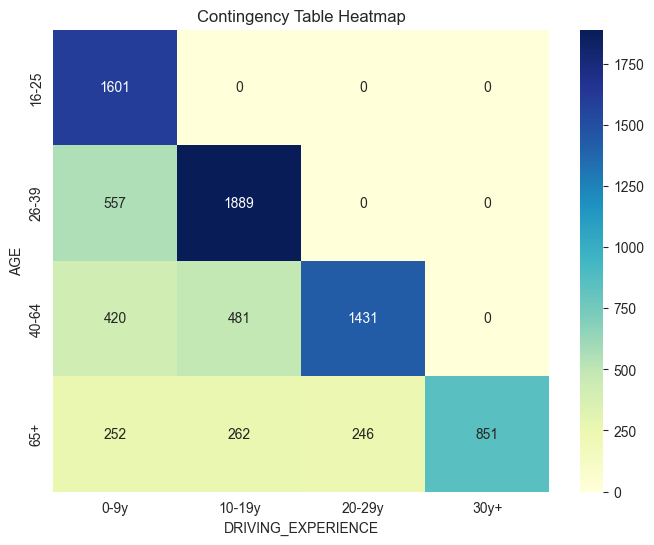

In [39]:
# Create a contingency table for 'AGE' and 'DRIVING_EXPERIENCE'
ct = pd.crosstab(df['AGE'], df['DRIVING_EXPERIENCE'])

# Display the contingency table
plt.figure(figsize=(8,6))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Contingency Table Heatmap')
plt.show()

The highest concentration of driving experience falls within the 10–19 year range. This aligns with the fact that the largest age group is between 26 and 39 years old, which is a plausible age range for accumulating this level of experience.


###  Feature Correlation 

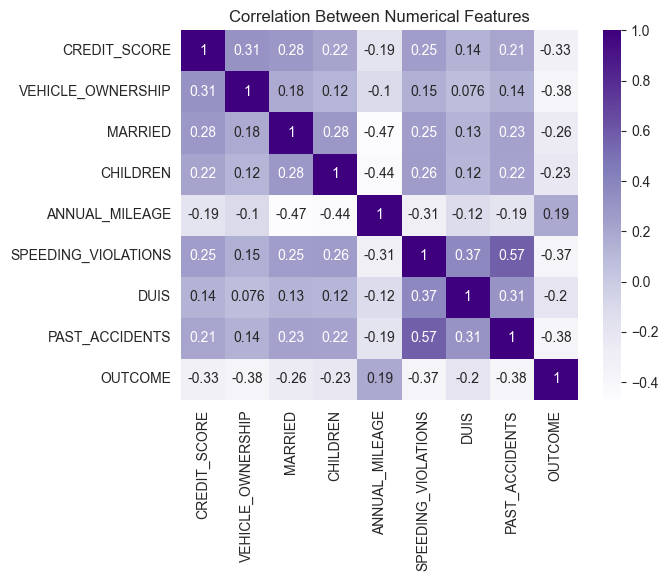

In [40]:
# find correlation between numerical features 
num_corr = num_cols.corr(method='spearman')

# show the correlation heatmap
sns.heatmap(num_corr, annot=True, cmap='Purples')
plt.title("Correlation Between Numerical Features")
plt.show()


There is no strong correlation between the target variable and any other numerical features.


However, there is a positive (direct) relationship between **PAST_ACCIDENTS** and **SPEEDING_VIOLATIONS**, indicating that more speeding violations are associated with a higher number of past accidents.  

Conversely, there is a negative (inverse) relationship between **ANNUAL_MILEAGE** and **CHILDREN**, suggesting that individuals with more children tend to have lower annual mileage.


---

## Final Conclusion



---

### Dataset Overview
Most people in our dataset use **regular cars**, and a large proportion of them are **young**.  
However, most of the data was collected from **a single location**, which may limit the generalizability of the findings.

---

### Missing Values
We had **two columns with missing values**, and these columns were **not related** to any other numerical or categorical columns.  
We decided to **fill them with the mean** so that any future **model pipeline** can work without issues.

---

### Outliers Handling
- **Near-normal distributions:**  
  Used the **Z-score method** and applied **clipping** to keep values within reasonable bounds.  
- **Non-normal distributions (right-skewed):**  
  Used the **IQR method** and applied **clipping** to avoid losing important values.  

We avoided removing outliers entirely because they appeared in **important columns** and represented **realistic values**.

---

### Insights
We extracted a few insights from the visualizations, many of which were **anticipated during the cleaning and exploration phase**.
